# Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Data

## Data Loader

In [2]:
a2c = 'a2c/normal/'
acer = 'ACER/'
ppo = 'PPO_35000/'
trpo = 'TRPO/'
rec_ppo = 'Recurrent_PPO/'
ars = 'ARS/'

a2c_adam = 'a2c/adam/'
a2c_normalize = 'a2c/normalize/'
a2c_tflike = 'a2c/tflike/'


In [3]:
df_a2c = pd.read_csv(a2c+'progress.csv')
df_acer = pd.read_csv(acer+'progress.csv')
df_ppo = pd.read_csv(ppo+'progress.csv')
df_trpo = pd.read_csv(trpo+'progress.csv')
df_rec_ppo = pd.read_csv(rec_ppo+'progress.csv')
df_ars = pd.read_csv(ars+'progress.csv')

df_a2c_adam = pd.read_csv(a2c_adam+'progress.csv')
df_a2c_normalize = pd.read_csv(a2c_normalize+'progress.csv')
df_a2c_tflike = pd.read_csv(a2c_tflike+'progress.csv')

df_a2c_70k = pd.read_csv('../finales/a2c_70k/progress.csv')
df_a2c_70k_normalized = pd.read_csv('../finales/a2c_70k_normalized/progress.csv')
df_a2c_final = pd.read_csv('../finales/a2c_callback/progress.csv')


In [4]:
df_a2c.ffill(inplace=True)
df_acer.ffill(inplace=True)
df_ppo.ffill(inplace=True)
df_trpo.ffill(inplace=True)
df_rec_ppo.ffill(inplace=True)
df_ars.ffill(inplace=True)
df_a2c_adam.ffill(inplace=True)
df_a2c_normalize.ffill(inplace=True)
df_a2c_tflike.ffill(inplace=True)
df_a2c_70k.ffill(inplace=True)
df_a2c_70k_normalized.ffill(inplace=True)
df_a2c_final.ffill(inplace=True)

## Data Visualizer

In [20]:
df_a2c.tail()

time/total_timesteps  train/learning_rate  eval/mean_ep_length  \
140                 35500               0.0007                 8.93   
141                 35500               0.0007                 8.93   
142                 36000               0.0007                 9.44   
143                 36000               0.0007                 9.44   
144                 36500               0.0007                 9.13   

     train/entropy_loss  train/explained_variance  eval/mean_reward  \
140           -0.876402                  0.722338            474.75   
141           -0.876402                  0.722338            474.75   
142           -0.835851                  0.609478            496.49   
143           -0.835851                  0.609478            496.49   
144           -1.349171                  0.829847            486.61   

     train/value_loss  train/n_updates  train/policy_loss  time/time_elapsed  \
140      15342.309570           7099.0        -170.512756            13082.0   
141      15342.309570           7099.0        -170.512756            13265.0   
142      18864.761719           7199.0         -30.604248            13265.0   
143      18864.761719           7199.0         -30.604248            13455.0   
144      15524.778320           7299.0          16.135736            13455.0   

     time/iterations  rollout/ep_len_mean  rollout/ep_rew_mean  time/fps  
140           7000.0                 9.11               491.23       2.0  
141           7100.0                 9.03               485.11       2.0  
142           7100.0                 9.03               485.11       2.0  
143           7200.0                 9.06               479.48       2.0  
144           7200.0                 9.06               479.48       2.0

In [21]:
df_acer.tail()

fps   norm_grads  loss_policy    entropy         loss        loss_q  \
11    4   429.288208   -19.529797  18.654221  6483.429199  13006.291016   
12    4  2669.881836   -70.584694  14.090509  8342.576172  16826.603516   
13    4  3469.833252    -9.815396  17.286007  6349.878906  12719.734375   
14    4   953.031006   -15.384562  16.709887  6481.355957  12993.815430   
15    4  3167.472412  -124.321915  16.933447  5084.500488  10417.983398   

    mean_episode_reward  avg_norm_adj    avg_norm_g  avg_norm_k  \
11              399.525      3.872614   1303.871216    9.549261   
12              387.000    296.774902  34024.734375    9.451391   
13              412.275      0.708666    174.438034    7.746083   
14              411.125      0.778528    170.160553    8.927266   
15              429.275     99.313004  12150.337891    9.151760   

    total_timesteps  avg_norm_k_dot_g      loss_f  mean_episode_length  \
11            22020       1561.030884  -19.529797                7.000   
12            24020      33995.929688  -70.584694                6.700   
13            26020        173.526733   -9.815396                7.000   
14            28020        164.404144  -15.384562                7.325   
15            30020      13625.888672 -124.321915                7.575   

    avg_norm_grads_f  explained_variance  loss_bc  norm_grads_policy  \
11       1301.522095            0.451474     -0.0         152.855499   
12      33876.066406            0.315148     -0.0         587.514526   
13        174.074890            0.288235     -0.0         297.060272   
14        169.783295            0.378709     -0.0         150.045258   
15      12094.445312            0.428107     -0.0         392.400330   

    norm_grads_q  
11    401.152802  
12   2604.437744  
13   3457.093750  
14    941.145325  
15   3143.072266

In [22]:
df_ppo.tail()

time/total_timesteps  eval/mean_reward  eval/mean_ep_length  \
86                 35000            220.64                 4.21   
87                 35500            230.90                 4.33   
88                 36000            240.14                 4.36   
89                 36500            227.59                 4.24   
90                 36864            227.59                 4.24   

    rollout/ep_rew_mean  time/iterations  time/fps  rollout/ep_len_mean  \
86               225.64             17.0       4.0                 4.30   
87               225.64             17.0       4.0                 4.30   
88               225.64             17.0       4.0                 4.30   
89               225.64             17.0       4.0                 4.30   
90               229.30             18.0       4.0                 4.28   

    time/time_elapsed  train/clip_range  train/clip_fraction  \
86             7558.0               0.2             0.061816   
87             7558.0               0.2             0.061816   
88             7558.0               0.2             0.061816   
89             7558.0               0.2             0.061816   
90             8014.0               0.2             0.061816   

    train/learning_rate  train/n_updates   train/loss  \
86               0.0003            170.0  4384.184082   
87               0.0003            170.0  4384.184082   
88               0.0003            170.0  4384.184082   
89               0.0003            170.0  4384.184082   
90               0.0003            170.0  4384.184082   

    train/explained_variance  train/value_loss  train/approx_kl  \
86                  0.460447      10615.702667         0.005806   
87                  0.460447      10615.702667         0.005806   
88                  0.460447      10615.702667         0.005806   
89                  0.460447      10615.702667         0.005806   
90                  0.460447      10615.702667         0.005806   

    train/entropy_loss  train/policy_gradient_loss  
86           -1.970969                    -0.01448  
87           -1.970969                    -0.01448  
88           -1.970969                    -0.01448  
89           -1.970969                    -0.01448  
90           -1.970969                    -0.01448

In [23]:
df_trpo.tail()

eval/mean_reward  eval/mean_ep_length  time/total_timesteps  \
86             81.88                 2.54                 35000   
87             70.33                 2.30                 35500   
88             80.69                 2.54                 36000   
89             79.39                 2.64                 36500   
90             79.39                 2.64                 36864   

    time/iterations  rollout/ep_len_mean  time/fps  rollout/ep_rew_mean  \
86             17.0                 2.44       4.0                80.59   
87             17.0                 2.44       4.0                80.59   
88             17.0                 2.44       4.0                80.59   
89             17.0                 2.44       4.0                80.59   
90             18.0                 2.44       4.0                78.55   

    time/time_elapsed  train/value_loss  train/is_line_search_success  \
86             7320.0       2746.463121                           1.0   
87             7320.0       2746.463121                           1.0   
88             7320.0       2746.463121                           1.0   
89             7320.0       2746.463121                           1.0   
90             7851.0       2746.463121                           1.0   

    train/policy_objective  train/n_updates  train/kl_divergence_loss  \
86                0.086922             17.0                  0.006104   
87                0.086922             17.0                  0.006104   
88                0.086922             17.0                  0.006104   
89                0.086922             17.0                  0.006104   
90                0.086922             17.0                  0.006104   

    train/explained_variance  train/learning_rate  
86                  0.674077                0.001  
87                  0.674077                0.001  
88                  0.674077                0.001  
89                  0.674077                0.001  
90                  0.674077                0.001

In [24]:
df_rec_ppo.tail()

time/time_elapsed  time/fps  time/iterations  rollout/ep_len_mean  \
339            12783.0       2.0            271.0                 4.44   
340            12798.0       2.0            272.0                 4.60   
341            12815.0       2.0            273.0                 4.27   
342            12815.0       2.0            273.0                 4.27   
343            12910.0       2.0            274.0                 4.28   

     time/total_timesteps  rollout/ep_rew_mean   train/loss  train/value_loss  \
339                 34688               243.70  8080.943848      16645.595898   
340                 34816               256.36  6048.179688      12288.298828   
341                 34944               232.94  6547.181152      13240.264355   
342                 35000               232.94  5586.435547      11259.892480   
343                 35072               239.70  5586.435547      11259.892480   

     train/learning_rate  train/approx_kl  train/entropy_loss  \
339               0.0003         0.000907           -1.663604   
340               0.0003         0.002342           -1.563376   
341               0.0003         0.008439           -1.538177   
342               0.0003         0.003457           -1.392061   
343               0.0003         0.003457           -1.392061   

     train/explained_variance  train/n_updates  train/clip_range  \
339                  0.360188           2700.0               0.2   
340                  0.359272           2710.0               0.2   
341                  0.407937           2720.0               0.2   
342                  0.356029           2730.0               0.2   
343                  0.356029           2730.0               0.2   

     train/policy_gradient_loss  train/clip_fraction  eval/mean_reward  \
339                   -0.000206             0.000000            249.40   
340                   -0.006470             0.000000            249.40   
341                   -0.010662             0.025781            249.40   
342                   -0.004684             0.000000            235.19   
343                   -0.004684             0.000000            235.19   

     eval/mean_ep_length  
339                 4.39  
340                 4.39  
341                 4.39  
342                 4.15  
343                 4.15

In [25]:
df_ars.tail()

train/learning_rate  rollout/ep_rew_mean  time/total_timesteps  \
1166                 0.02                -84.0                 34932   
1167                 0.02                -84.0                 34964   
1168                 0.02                -84.0                 34996   
1169                 0.02                -84.0                 35000   
1170                 0.02                -84.0                 35028   

      rollout/return_std  train/delta_std  time/fps  train/iterations  \
1166                 0.0             0.05       3.0            1097.0   
1167                 0.0             0.05       3.0            1098.0   
1168                 0.0             0.05       3.0            1099.0   
1169                 0.0             0.05       3.0            1099.0   
1170                 0.0             0.05       3.0            1100.0   

      rollout/ep_len_mean  time/time_elapsed  train/step_size  \
1166                  2.0             9819.0          20000.0   
1167                  2.0             9828.0          20000.0   
1168                  2.0             9835.0          20000.0   
1169                  2.0             9835.0          20000.0   
1170                  2.0             9885.0          20000.0   

      eval/mean_reward  eval/mean_ep_length  
1166             -84.0                  2.0  
1167             -84.0                  2.0  
1168             -84.0                  2.0  
1169             -84.0                  2.0  
1170             -84.0                  2.0

## Eval Between RL Algorithms

### Mean Reward

In [26]:
eval_reward_mean_df = pd.DataFrame()
eval_reward_mean_df['a2c'] = df_a2c['eval/mean_reward']
eval_reward_mean_df['acer'] = df_acer['mean_episode_reward']
eval_reward_mean_df['ppo'] = df_ppo['eval/mean_reward']
eval_reward_mean_df['trpo'] = df_trpo['eval/mean_reward']
eval_reward_mean_df['rec_ppo'] = df_rec_ppo['eval/mean_reward']
eval_reward_mean_df['ars'] = df_ars['eval/mean_reward']


In [27]:
rollout_reward_mean_df = pd.DataFrame()
rollout_reward_mean_df['a2c'] = df_a2c['rollout/ep_rew_mean']
rollout_reward_mean_df['acer'] = df_acer['mean_episode_reward']
rollout_reward_mean_df['ppo'] = df_ppo['rollout/ep_rew_mean']
rollout_reward_mean_df['trpo'] = df_trpo['rollout/ep_rew_mean']
rollout_reward_mean_df['rec_ppo'] = df_rec_ppo['rollout/ep_rew_mean']
rollout_reward_mean_df['ars'] = df_ars['rollout/ep_rew_mean']

In [39]:
fig = px.line(eval_reward_mean_df[['a2c','acer','ppo','trpo','rec_ppo','ars']], title='Mean Episode Reward (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [29]:
fig = px.line(rollout_reward_mean_df[['a2c','acer','ppo','trpo','rec_ppo','ars']], title='Mean Episode Reward (Rollout)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

### Episode Length

In [35]:
eval_ep_len_mean_df = pd.DataFrame()
eval_ep_len_mean_df['a2c'] = df_a2c['eval/mean_ep_length']
eval_ep_len_mean_df['acer'] = df_acer['mean_episode_length']
eval_ep_len_mean_df['ppo'] = df_ppo['eval/mean_ep_length']
eval_ep_len_mean_df['trpo'] = df_trpo['eval/mean_ep_length']
eval_ep_len_mean_df['rec_ppo'] = df_rec_ppo['eval/mean_ep_length']
eval_ep_len_mean_df['ars'] = df_ars['eval/mean_ep_length']

In [36]:
rollout_ep_len_mean_df = pd.DataFrame()
rollout_ep_len_mean_df['a2c'] = df_a2c['rollout/ep_len_mean']
rollout_ep_len_mean_df['acer'] = df_acer['mean_episode_length']
rollout_ep_len_mean_df['ppo'] = df_ppo['rollout/ep_len_mean']
rollout_ep_len_mean_df['trpo'] = df_trpo['rollout/ep_len_mean']
rollout_ep_len_mean_df['rec_ppo'] = df_rec_ppo['rollout/ep_len_mean']
rollout_ep_len_mean_df['ars'] = df_ars['rollout/ep_len_mean']

In [37]:
fig = px.line(eval_ep_len_mean_df[['a2c','acer','ppo','trpo','rec_ppo','ars']], title='Mean Episode Length (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [38]:
fig = px.line(rollout_ep_len_mean_df[['a2c','acer','ppo','trpo','rec_ppo','ars']], title='Mean Episode Length (Rollout)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

# Eval Between A2C Variants

### Mean Reward

In [11]:
a2c_eval_reward = pd.DataFrame()
a2c_eval_reward['a2c'] = df_a2c['eval/mean_reward']
a2c_eval_reward['a2c_adam'] = df_a2c_adam['eval/mean_reward']
a2c_eval_reward['a2c_normalize'] = df_a2c_normalize['eval/mean_reward']
a2c_eval_reward['a2c_tflike'] = df_a2c_tflike['eval/mean_reward']

In [12]:
a2c_rollout_reward = pd.DataFrame()
a2c_rollout_reward['a2c'] = df_a2c['rollout/ep_rew_mean']
a2c_rollout_reward['a2c_adam'] = df_a2c_adam['rollout/ep_rew_mean']
a2c_rollout_reward['a2c_normalize'] = df_a2c_normalize['rollout/ep_rew_mean']
a2c_rollout_reward['a2c_tflike'] = df_a2c_tflike['rollout/ep_rew_mean']

In [13]:
fig = px.line(a2c_eval_reward[['a2c','a2c_adam','a2c_normalize','a2c_tflike']], title='Mean Episode Reward (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [14]:
fig = px.line(a2c_rollout_reward[['a2c','a2c_adam','a2c_normalize','a2c_tflike']], title='Mean Episode Reward (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

### Episode Length

In [5]:
a2c_variants_ep_lenght = pd.DataFrame()
a2c_variants_ep_lenght['a2c'] = df_a2c['eval/mean_ep_length']
a2c_variants_ep_lenght['a2c_adam'] = df_a2c_adam['eval/mean_ep_length']
a2c_variants_ep_lenght['a2c_normalize'] = df_a2c_normalize['eval/mean_ep_length']
a2c_variants_ep_lenght['a2c_tflike'] = df_a2c_tflike['eval/mean_ep_length']

In [9]:
a2c_rollout_ep_lenght = pd.DataFrame()
a2c_rollout_ep_lenght['a2c'] = df_a2c['rollout/ep_len_mean']
a2c_rollout_ep_lenght['a2c_adam'] = df_a2c_adam['rollout/ep_len_mean']
a2c_rollout_ep_lenght['a2c_normalize'] = df_a2c_normalize['rollout/ep_len_mean']
a2c_rollout_ep_lenght['a2c_tflike'] = df_a2c_tflike['rollout/ep_len_mean']

In [7]:
fig = px.line(a2c_variants_ep_lenght[['a2c','a2c_adam','a2c_normalize','a2c_tflike']], title='Mean Episode Length (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [10]:
fig = px.line(a2c_rollout_ep_lenght[['a2c','a2c_adam','a2c_normalize','a2c_tflike']], title='Mean Episode Length (Rollout)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

# A2C Finals

### Mean Reward

In [10]:
a2c_70k_reward_eval = pd.DataFrame()
a2c_70k_reward_eval['a2c'] = df_a2c['eval/mean_reward']
a2c_70k_reward_eval['a2c_70k'] = df_a2c_70k['eval/mean_reward']
a2c_70k_reward_eval['a2c_70k_normalized'] = df_a2c_70k_normalized['eval/mean_reward']


In [11]:
a2c_70k_reward_rollout = pd.DataFrame()
a2c_70k_reward_rollout['a2c'] = df_a2c['eval/mean_reward']
a2c_70k_reward_rollout['a2c_70k'] = df_a2c_70k['eval/mean_reward']
a2c_70k_reward_rollout['a2c_70k_normalized'] = df_a2c_70k_normalized['eval/mean_reward']


In [12]:
fig = px.line(a2c_70k_reward_eval[['a2c','a2c_70k','a2c_70k_normalized']], title='Mean Reward (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [13]:
fig = px.line(a2c_70k_reward_rollout[['a2c','a2c_70k','a2c_70k_normalized']], title='Mean Reward (Rollout)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

### Ep Length

In [14]:
a2c_70k_lenght_eval = pd.DataFrame()
a2c_70k_lenght_eval['a2c'] = df_a2c['eval/mean_ep_length']
a2c_70k_lenght_eval['a2c_70k'] = df_a2c_70k['eval/mean_ep_length']
a2c_70k_lenght_eval['a2c_70k_normalized'] = df_a2c_70k_normalized['eval/mean_ep_length']


In [15]:
a2c_70k_lenght_rollout = pd.DataFrame()
a2c_70k_lenght_rollout['a2c'] = df_a2c['eval/mean_ep_length']
a2c_70k_lenght_rollout['a2c_70k'] = df_a2c_70k['eval/mean_ep_length']
a2c_70k_lenght_rollout['a2c_70k_normalized'] = df_a2c_70k_normalized['eval/mean_ep_length']


In [16]:
fig = px.line(a2c_70k_lenght_eval[['a2c','a2c_70k','a2c_70k_normalized']], title='Mean Episode Lenght (Eval)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [17]:
fig = px.line(a2c_70k_lenght_rollout[['a2c','a2c_70k','a2c_70k_normalized']], title='Mean Episode Lenght  (Rollout)')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

# Modelo Final

Entrenado con 290.000 time steps, 9 horas y media de entrenamiento.

In [5]:
df_a2c_final.tail()

time/fps  time/iterations  time/time_elapsed  train/value_loss  \
632       8.0          57600.0            33417.0        440.557953   
633       8.0          57700.0            33457.0        852.592957   
634       8.0          57800.0            33497.0          6.499296   
635       8.0          57900.0            33537.0        203.399033   
636       8.0          57900.0            33537.0        845.838074   

     train/learning_rate  time/total_timesteps  train/explained_variance  \
632               0.0007                288000                  0.995554   
633               0.0007                288500                  0.908904   
634               0.0007                289000                  0.998906   
635               0.0007                289500                  0.988005   
636               0.0007                290000                  0.988619   

     train/n_updates  train/entropy_loss  rollout/ep_len_mean  \
632          57599.0           -0.726484                12.11   
633          57699.0           -0.949422                12.12   
634          57799.0           -0.620114                12.46   
635          57899.0           -0.831194                12.22   
636          57999.0           -0.902077                12.22   

     train/policy_loss  rollout/ep_rew_mean  eval/mean_ep_length  \
632          -2.209376               573.79                 9.17   
633          43.496418               573.44                 9.17   
634           0.350247               589.38                 9.17   
635           6.578817               576.63                 9.17   
636          18.319540               576.63                13.27   

     eval/mean_reward  
632            442.29  
633            442.29  
634            442.29  
635            442.29  
636            626.94

In [65]:
df_a2c_final[['rollout/ep_len_mean','eval/mean_ep_length','rollout/ep_rew_mean','eval/mean_reward']].max()

rollout/ep_len_mean     13.67
eval/mean_ep_length     14.54
rollout/ep_rew_mean    632.87
eval/mean_reward       681.83
dtype: float64

In [59]:
fig = px.line(df_a2c_final[['rollout/ep_len_mean','eval/mean_ep_length']], title='Mean Episode Lenght')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLength')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [73]:
fig = px.line(df_a2c_final[['rollout/ep_rew_mean','eval/mean_reward']], title='Mean Episode Reward')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [54]:
with open('../finales/a2c_callback/current_actions_log.txt') as f:
    actions = f.readlines()

actions = [x.replace('\n','') for x in actions]
actions = [x.replace('[','') for x in actions]
actions = [x.replace(']','') for x in actions]
actions = [x.split(',') for x in actions]

max_len = 0
for i in actions:
    if len(i) > max_len:
        max_len = len(i)
        actions_values = i 

In [64]:
print('Premes maximas ejecutadas:',max_len)
print('Premes:',actions_values)

Premes maximas ejecutadas: 20
Premes: ['0', ' 110', ' 44', ' 37', ' 14', ' 9', ' 43', ' 33', ' 26', ' 38', ' 28', ' 89', ' 41', ' 29', ' 27', ' 105', ' 3', ' 63', ' 50', ' 3']


# All Results

In [13]:
reward_mean = pd.DataFrame()
reward_mean['a2c'] = df_a2c_final['rollout/ep_rew_mean']
reward_mean['acer'] = df_acer['mean_episode_reward']
reward_mean['ppo'] = df_ppo['rollout/ep_rew_mean']
reward_mean['trpo'] = df_trpo['rollout/ep_rew_mean']
reward_mean['rec_ppo'] = df_rec_ppo['rollout/ep_rew_mean']
reward_mean['ars'] = df_ars['rollout/ep_rew_mean']
reward_mean['a2c_adam'] = df_a2c_adam['rollout/ep_rew_mean']
reward_mean['a2c_normalize'] = df_a2c_normalize['rollout/ep_rew_mean']
reward_mean['a2c_tflike'] = df_a2c_tflike['rollout/ep_rew_mean']
reward_mean['a2c_70k_normalized'] = df_a2c_70k_normalized['rollout/ep_rew_mean']


In [17]:
reward_mean.max()

a2c                   632.870
acer                  429.275
ppo                   229.300
trpo                   80.590
rec_ppo               263.810
ars                   -83.000
a2c_adam              453.180
a2c_normalize         285.210
a2c_tflike            359.040
a2c_70k_normalized    -66.120
dtype: float64

In [14]:
len_mean = pd.DataFrame()
len_mean['a2c'] = df_a2c_final['rollout/ep_len_mean']
len_mean['acer'] = df_acer['mean_episode_length']
len_mean['ppo'] = df_ppo['rollout/ep_len_mean']
len_mean['trpo'] = df_trpo['rollout/ep_len_mean']
len_mean['rec_ppo'] = df_rec_ppo['rollout/ep_len_mean']
len_mean['ars'] = df_ars['rollout/ep_len_mean']
len_mean['a2c_adam'] = df_a2c_adam['rollout/ep_len_mean']
len_mean['a2c_normalize'] = df_a2c_normalize['rollout/ep_len_mean']
len_mean['a2c_tflike'] = df_a2c_tflike['rollout/ep_len_mean']
len_mean['a2c_70k_normalized'] = df_a2c_70k_normalized['rollout/ep_len_mean']


In [18]:
len_mean.max()

a2c                   13.6700
acer                   7.5750
ppo                    4.3000
trpo                   2.4400
rec_ppo                4.6300
ars                    2.0625
a2c_adam               8.7100
a2c_normalize          6.0900
a2c_tflike             7.0000
a2c_70k_normalized     4.0000
dtype: float64

In [15]:
fig = px.line(reward_mean, title='Mean Episode Reward')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardMean')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

In [16]:
fig = px.line(len_mean, title='Mean Episode Lenght')
fig.update_xaxes(title_text='Iteration')
fig.update_yaxes(title_text='EpRewardLenght')

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)

fig.show()

# Coverage

In [13]:
with open('../finales/a2c_callback/current_actions_log.txt') as f:
    actions = f.readlines()

actions = [x.replace(' ','') for x in actions]
actions = [x.replace('\n','') for x in actions]
actions = [x.replace('[','') for x in actions]
actions = [x.replace(']','') for x in actions]
actions = [x.split(',') for x in actions]

In [29]:
cov_dict = {}
for i in actions:
    for j in i:
        if j in cov_dict:
            cov_dict[j] += 1
        else:
            cov_dict[j] = 1

In [34]:
cov_dict = {k: v for k, v in sorted(cov_dict.items(), key=lambda item: item[1], reverse=True)}

In [37]:
fig = px.bar(y=cov_dict.values(), x=cov_dict.keys(), title='Premes Coverage', log_y=True)

fig.update_xaxes(title_text='Preme ID')
fig.update_yaxes(title_text='Total Count')

fig.update_layout(
    autosize=False,
    width=2000,
    height=800,)
   
fig.show()

# Test Coverage

In [11]:
test_premes = '/home/felipe/Desktop/trabajo/digevo/benchmarks/Startups_test_1.xlsx'
df_test = pd.read_excel(test_premes, sheet_name='Sheet1')

In [32]:
def premes_to_list(df):
    list_dict = []

    for i in range(len(df)):
        d1 = {}
        d2 = {}
        for name, value in df.iloc[i].items():
            #print(name,value)
            if 'Unnamed' not in name:
                value_clean = str(value).replace('[','')
                value_clean = value_clean.replace(']','')
                value_clean = value_clean.replace("'",'')
                value_clean = value_clean.split(',')[0]
                #print(value_clean)
                d2[name] = value_clean
        d1['data'] = d2
        list_dict.append(d1)

    return list_dict

In [30]:
prueba = 'asd1'
prueba2 = prueba.replace('[','')
prueba2

'asd1'

In [33]:
list_dict

[{'data': {'pm_scope': 'Local',
   'pm_actors': 'Consumidor final',
   'pm_problem_competitors ': 'Sí y existen diversas soluciones que resuelven el problema',
   'pm_importance': 'Poco importante',
   'pm_affected': 'Creciente',
   'pm_urgency': 'Este mes',
   'pm_price': 'Caro',
   'pm_frequency': 'Anual',
   'pm_industry': 'Turismo',
   'pm_industry_maturation': 'La industria se encuentra fuertemente en estado de crecimiento',
   'pm_sam': 'Mayor a 60000 USD',
   'pm_techno_level': 'Altamente tecnologizado',
   'pm_protected_problem': 'Sí',
   'pm_organic_problem': 'No',
   'pm_tam': 'Mayor a 60000 USD',
   'pm_competitors ': '5',
   'pm_accessibility': '20',
   'pm_solution_progress': 'Crecimiento',
   'pm_solution_transfer': 'Servicios prestados por una plataforma de software',
   'pm_technology_core': 'Blockchain',
   'pm_defined_business_model': 'Sí',
   'pm_degree_innovation': 'Tecnología',
   'pm_potential_solution': 'Bajo',
   'pm_orchestration_level': '50',
   'pm_benefited_

In [13]:
df_test.dtypes

Unnamed: 0                  int64
pm_scope                   object
pm_actors                  object
pm_problem_competitors     object
pm_importance              object
                            ...  
pm_n_countries              int64
pm_escalation_strategy     object
pm_valuation               object
pm_scalable_model          object
pm_motor_growth            object
Length: 74, dtype: object

# Graphs

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import json 

%matplotlib inline

In [4]:
premes_path  = '/home/felipe/Desktop/trabajo/digevo/evo2_reinforcement_learning/app/environments/evolution/evolution/envs/premes.json'

In [5]:
with open(premes_path) as f:
    premes = json.load(f)

In [6]:
premes

{'pr_initial_assestment12': {'id': 0,
  'name': 'Assessment Inicial (dim1 y dim2)',
  'repetitive': 0,
  'restrictions': [],
  'effects': [{'var_name': 'pm_dedication_time',
    'operator': 'set',
    'value': 1.0,
    'dimension': 3.0,
    'inc_dim': 0.052},
   {'var_name': 'pm_founders_total',
    'operator': 'set',
    'value': 1.0,
    'dimension': 3.0,
    'inc_dim': 0.052},
   {'var_name': 'pm_big_thinking',
    'operator': 'set',
    'value': 1.0,
    'dimension': 3.0,
    'inc_dim': 0.052},
   {'var_name': 'pm_breakeven',
    'operator': 'set',
    'value': 1.0,
    'dimension': 4.0,
    'inc_dim': 0.045},
   {'var_name': 'pm_lean_ability',
    'operator': 'set',
    'value': 1.0,
    'dimension': 4.0,
    'inc_dim': 0.045},
   {'var_name': 'pm_agility',
    'operator': 'set',
    'value': 1.0,
    'dimension': 3.0,
    'inc_dim': 0.052},
   {'var_name': 'pm_prudence',
    'operator': 'random',
    'value': 5.0,
    'dimension': 3.0,
    'inc_dim': 0.052},
   {'var_name': 'pm_p

In [7]:
g = nx.DiGraph(premes)

In [9]:
g

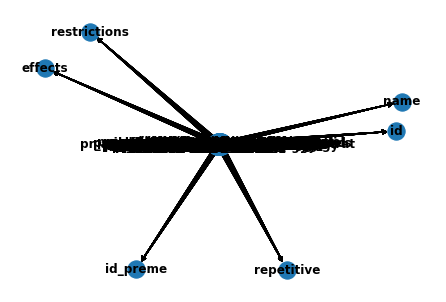

In [8]:
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()